Плоская синфазная антенная решетка, состоящая из полуволно- вых линейных симметричных вибраторов (рис. 4.20), возбуждена токами равных амплитуд. Для условий $n_1 = n_2 = 6$ и $d_1 = d_2 = 0,5λ$ рассчитать нормированную амплитудную характеристику направленности в E – плоскости. Построить соответствующую ей нормированную амплитудную диаграмму направленности.

![](../img/Chapter_4_example_1_picture_1.png)

**Решение задачи**
Согласно рис. 4.20, плоскость ZOY является E – плоскостью. Для этой плоскости $φ = 90°$. По условиям задачи антенная решетка является равноамплитуд- ной и синфазной, а все элементы решетки ориентированы вдоль оси Y. Воспользуемся формулой:
$f(θ,φ=90°)=f_{ЛСЭВ}(θ,φ=90°)f_c(θ,φ=90°)$, (1)
где:
$f_{ЛСЭВ}(θ,φ=90°)=|\frac{cos(klsin(θ))-cos(kl)}{cos(θ)}|$; (2)
$f_c(θ,φ=90°)=|\frac{sin(n_2kd_2sin(θ)/2)}{sin(kd_2sin(θ)/2)}|$ (3)

Подставим (3) и (2) в (1):
$f(θ,φ=90°)=|\frac{cos(klsin(θ))-cos(kl)}{cos(θ)}|*|\frac{sin(n_2kd_2sin(θ)/2)}{sin(kd_2sin(θ)/2)}|$ (4)

In [1]:
# Импортируем необходимые библиотеки
import numpy
import matplotlib.pyplot as plt

In [2]:
n2 = 6  # число излучателей в ряду решетки
d2 = 0.5  # шаг решетки в долях длины волны
L = 0.25  # длина плеча вибратора
# Задаем угл тета в градусах с параметрами:
# начальное значение - 0.01
# конечное значение - 360
# количество точек - 360
TETA = (numpy.pi/180)*numpy.linspace(0.01, 360, 360)

In [3]:
# Функция get_unnormalized_hn рассчитывает ненормированную характеристику
# направленности в зависимости от угла teta по формуле 4.
def get_unnormalized_hn(teta):
    return numpy.array(
        numpy.abs((numpy.cos(2*numpy.pi*L*numpy.sin(teta))-numpy.cos(2*numpy.pi*L))/numpy.cos(teta)) *
        numpy.abs((numpy.sin(n2*2*numpy.pi*d2*numpy.sin(teta)/2)/
                   numpy.sin(2*numpy.pi*d2*numpy.sin(teta)/2)))
    )


# Функция get_max_hn рассчитывает максимальное значение ненормированной характеристики направленности
def get_max_hn(hn):
    return numpy.max(hn)


# Функция get_normalized_hn рассчитывает ненормированную характеристику направленности,
# определяет ее максимальное значение,
# а потом рассчитывает нормированную характеристику направленности
def get_normalized_hn(teta, maxf):
    f = get_unnormalized_hn(teta)
    return (1/maxf) * numpy.abs(f)

In [4]:
f = get_unnormalized_hn(TETA)  # получаем ненормированную характеристику направленности
M = get_max_hn(f)  # поулаем максимальное значение
F = get_normalized_hn(TETA, M)

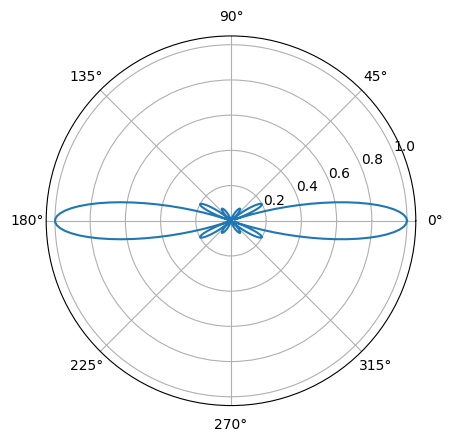

In [5]:
plt.polar(TETA, F)
plt.show()

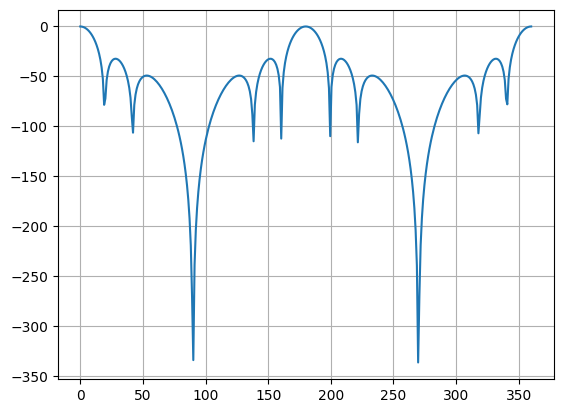

In [6]:
plt.plot(TETA / (numpy.pi/180), 20 * numpy.log(F))
plt.grid()
plt.show()